In [1]:
import pandas as pd
df = pd.read_csv('train_cab.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [3]:
# drop all rows with any NaN and NaT values
#df = df.dropna()
df = df.dropna()

In [4]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
df = df[(df != 0).all(1)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15609 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15609 non-null  object 
 1   pickup_datetime    15609 non-null  object 
 2   pickup_longitude   15609 non-null  float64
 3   pickup_latitude    15609 non-null  float64
 4   dropoff_longitude  15609 non-null  float64
 5   dropoff_latitude   15609 non-null  float64
 6   passenger_count    15609 non-null  float64
dtypes: float64(5), object(2)
memory usage: 975.6+ KB


In [7]:
df.isnull().sum().sum()

0

In [8]:
df['fare_amount']=pd.to_numeric(df['fare_amount'],errors='coerce')

In [9]:
df.isnull().sum().sum()

1

In [10]:
df = df[(df != 0).all(1)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15608 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15607 non-null  float64
 1   pickup_datetime    15608 non-null  object 
 2   pickup_longitude   15608 non-null  float64
 3   pickup_latitude    15608 non-null  float64
 4   dropoff_longitude  15608 non-null  float64
 5   dropoff_latitude   15608 non-null  float64
 6   passenger_count    15608 non-null  float64
dtypes: float64(6), object(1)
memory usage: 975.5+ KB


In [12]:
df.count()

fare_amount          15607
pickup_datetime      15608
pickup_longitude     15608
pickup_latitude      15608
dropoff_longitude    15608
dropoff_latitude     15608
passenger_count      15608
dtype: int64

In [13]:
row_del = df[ df['fare_amount'] <= 0 ].index 
row_del2 = df[ df['passenger_count'] == 0].index

In [14]:
df.drop(row_del, inplace = True) 
df.drop(row_del2, inplace = True) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15604 non-null  float64
 1   pickup_datetime    15605 non-null  object 
 2   pickup_longitude   15605 non-null  float64
 3   pickup_latitude    15605 non-null  float64
 4   dropoff_longitude  15605 non-null  float64
 5   dropoff_latitude   15605 non-null  float64
 6   passenger_count    15605 non-null  float64
dtypes: float64(6), object(1)
memory usage: 975.3+ KB


In [16]:
df.to_csv('train_cab_after_preprocess.csv') 

In [17]:
df.isnull().sum().sum()

1

In [18]:
df = df.dropna()

In [19]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000
mean,15.124025,-73.911256,40.712564,-73.906061,40.687407,2.635518
std,436.456681,2.663899,3.895901,2.715778,2.637200,61.602739
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,0.120000
25%,6.000000,-73.992369,40.736548,-73.991368,40.736285,1.000000
50%,8.500000,-73.982044,40.753299,-73.980548,40.754211,1.000000
75%,12.500000,-73.968059,40.767801,-73.965370,40.768305,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [20]:
import numpy as np;
import math
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df['dist'] = haversine(df.pickup_longitude,df.pickup_latitude,df.dropoff_longitude,df.dropoff_latitude)

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,0.410442
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,4.628504
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.001022
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,0.910440
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.361021


In [22]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1) 

In [23]:
df.head()

,fare_amount,pickup_datetime,passenger_count,dist
0,4.5,2009-06-15 17:26:21 UTC,1.0,0.410442
1,16.9,2010-01-05 16:52:16 UTC,1.0,4.628504
2,5.7,2011-08-18 00:35:00 UTC,2.0,1.001022
3,7.7,2012-04-21 04:30:42 UTC,1.0,0.910440
4,5.3,2010-03-09 07:51:00 UTC,1.0,1.361021


In [24]:
df['pickup_datetime'] = df['pickup_datetime'].map(lambda x: x.rstrip('C'))
df['pickup_datetime'] = df['pickup_datetime'].map(lambda x: x.rstrip('T'))
df['pickup_datetime'] = df['pickup_datetime'].map(lambda x: x.rstrip('U'))

In [25]:
df['pickup_datetime'].head()

0    2009-06-15 17:26:21 
1    2010-01-05 16:52:16 
2    2011-08-18 00:35:00 
3    2012-04-21 04:30:42 
4    2010-03-09 07:51:00 
Name: pickup_datetime, dtype: object

In [26]:
df[['Date','time']] = df.pickup_datetime.str.split(expand=True) 

In [27]:
df.head()

,fare_amount,pickup_datetime,passenger_count,dist,Date,time
0,4.5,2009-06-15 17:26:21,1.0,0.410442,2009-06-15,17:26:21
1,16.9,2010-01-05 16:52:16,1.0,4.628504,2010-01-05,16:52:16
2,5.7,2011-08-18 00:35:00,2.0,1.001022,2011-08-18,00:35:00
3,7.7,2012-04-21 04:30:42,1.0,0.910440,2012-04-21,04:30:42
4,5.3,2010-03-09 07:51:00,1.0,1.361021,2010-03-09,07:51:00


In [28]:
df[['Yr','month','day']] = df.Date.str.split("-",expand=True) 

In [29]:
df[['Hour','minute','seconds']] = df.time.str.split(":",expand=True)

In [30]:
df.head()

,fare_amount,pickup_datetime,passenger_count,dist,Date,time,Yr,month,day,Hour,minute,seconds
0,4.5,2009-06-15 17:26:21,1.0,0.410442,2009-06-15,17:26:21,2009,06,15,17,26,21
1,16.9,2010-01-05 16:52:16,1.0,4.628504,2010-01-05,16:52:16,2010,01,05,16,52,16
2,5.7,2011-08-18 00:35:00,2.0,1.001022,2011-08-18,00:35:00,2011,08,18,00,35,00
3,7.7,2012-04-21 04:30:42,1.0,0.910440,2012-04-21,04:30:42,2012,04,21,04,30,42
4,5.3,2010-03-09 07:51:00,1.0,1.361021,2010-03-09,07:51:00,2010,03,09,07,51,00


In [31]:
df = df.drop(['pickup_datetime', 'Date','time'], axis = 1) 

In [32]:
df.head()

,fare_amount,passenger_count,dist,Yr,month,day,Hour,minute,seconds
0,4.5,1.0,0.410442,2009,06,15,17,26,21
1,16.9,1.0,4.628504,2010,01,05,16,52,16
2,5.7,2.0,1.001022,2011,08,18,00,35,00
3,7.7,1.0,0.910440,2012,04,21,04,30,42
4,5.3,1.0,1.361021,2010,03,09,07,51,00


In [33]:
df = df.drop(['minute','seconds','day'],axis = 1 )

In [34]:
df.head()

,fare_amount,passenger_count,dist,Yr,month,Hour
0,4.5,1.0,0.410442,2009,06,17
1,16.9,1.0,4.628504,2010,01,16
2,5.7,2.0,1.001022,2011,08,00
3,7.7,1.0,0.910440,2012,04,04
4,5.3,1.0,1.361021,2010,03,07


In [35]:
df.isnull().sum().sum()

2

In [36]:
df['Hour'].isnull().sum().sum()

1

In [37]:
df.describe()

,fare_amount,passenger_count,dist
count,15604.000000,15604.000000,15604.000000
mean,15.124025,2.635518,3.320202
std,436.456681,61.602739,59.670713
min,0.010000,0.120000,0.000000
25%,6.000000,1.000000,0.847640
50%,8.500000,1.000000,1.551132
75%,12.500000,2.000000,2.869478
max,54343.000000,5345.000000,7339.798149


In [38]:
df = df.dropna()

In [39]:
df.isnull().sum().sum()

0

In [40]:
df.describe()

,fare_amount,passenger_count,dist
count,15603.000000,15603.000000,15603.000000
mean,15.124257,2.635623,3.320337
std,436.470667,61.604712,59.672623
min,0.010000,0.120000,0.000000
25%,6.000000,1.000000,0.847546
50%,8.500000,1.000000,1.551165
75%,12.500000,2.000000,2.869533
max,54343.000000,5345.000000,7339.798149


In [41]:
df.Yr.unique()

array(['2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

In [42]:
df.month.unique()

array(['06', '01', '08', '04', '03', '11', '09', '07', '02', '12', '05',
       '10'], dtype=object)

In [43]:
df.isnull().sum().sum()

0

In [44]:
df.fare_amount.unique()

array([4.5000e+00, 1.6900e+01, 5.7000e+00, 7.7000e+00, 5.3000e+00,
       1.2100e+01, 7.5000e+00, 1.6500e+01, 8.9000e+00, 4.1000e+00,
       7.0000e+00, 1.2500e+01, 4.0000e+00, 1.0500e+01, 1.1500e+01,
       4.9000e+00, 6.1000e+00, 7.3000e+00, 9.3000e+00, 5.5000e+00,
       3.1900e+01, 1.8100e+01, 5.8000e+01, 9.0000e+00, 9.8000e+00,
       8.1000e+00, 1.0900e+01, 1.7500e+01, 6.9000e+00, 3.3000e+00,
       9.7000e+00, 8.0000e+00, 2.5500e+01, 1.5300e+01, 3.4670e+01,
       1.3700e+01, 6.5000e+00, 5.0000e+00, 8.5000e+00, 3.7000e+00,
       1.0100e+01, 1.5070e+01, 2.4900e+01, 1.7000e+01, 1.2000e+01,
       1.1000e+01, 1.3500e+01, 1.4000e+01, 1.0000e+01, 1.4100e+01,
       5.2000e+01, 1.1300e+01, 1.2900e+01, 9.5000e+00, 1.4500e+01,
       3.2500e+01, 1.7700e+01, 4.9570e+01, 2.2500e+01, 5.2500e+01,
       1.6000e+01, 2.1500e+01, 1.4900e+01, 3.5500e+01, 1.1700e+01,
       2.3000e+01, 2.4500e+01, 6.0000e+00, 2.7000e+01, 1.6100e+01,
       1.5700e+01, 2.6900e+01, 4.2500e+01, 1.5500e+01, 3.0900e

In [45]:
df ['passenger_count']=df.passenger_count.astype(int)

In [46]:
df.passenger_count.unique()

array([   1,    2,    3,    6,    5,    4,  456, 5334,  535,  354,  554,
         53,   35,  345, 5345,  536,   43,   58,  537,   87,  531,    0,
        557])

In [47]:
row_del2 = df[ df['passenger_count'] == 0].index
row_del = df[df['fare_amount'] <= 1 ].index
df.drop(row_del2) 
df.drop(row_del )

,fare_amount,passenger_count,dist,Yr,month,Hour
0,4.5,1,0.410442,2009,06,17
1,16.9,1,4.628504,2010,01,16
2,5.7,2,1.001022,2011,08,00
3,7.7,1,0.910440,2012,04,04
4,5.3,1,1.361021,2010,03,07
...,...,...,...,...,...,...
16061,10.9,1,3.540195,2009,05,18
16062,6.5,1,1.107587,2014,12,07
16063,16.1,2,4.200672,2009,07,07
16064,8.5,1,0.869175,2009,11,11


In [48]:
df.describe()

,fare_amount,passenger_count,dist
count,15603.000000,15603.000000,15603.000000
mean,15.124257,2.635583,3.320337
std,436.470667,61.604602,59.672623
min,0.010000,0.000000,0.000000
25%,6.000000,1.000000,0.847546
50%,8.500000,1.000000,1.551165
75%,12.500000,2.000000,2.869533
max,54343.000000,5345.000000,7339.798149


In [49]:
df.to_csv('train_cab_after_preprocess2.csv') 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15603 entries, 0 to 16065
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15603 non-null  float64
 1   passenger_count  15603 non-null  int32  
 2   dist             15603 non-null  float64
 3   Yr               15603 non-null  object 
 4   month            15603 non-null  object 
 5   Hour             15603 non-null  object 
dtypes: float64(2), int32(1), object(3)
memory usage: 1.4+ MB


In [51]:
row_del2 = df[ df['passenger_count'] == 0].index
df = df.drop(row_del2, inplace = False) 

In [52]:
df[ df['passenger_count'] == 0].count()

fare_amount        0
passenger_count    0
dist               0
Yr                 0
month              0
Hour               0
dtype: int64

In [53]:
df.describe()

,fare_amount,passenger_count,dist
count,15602.000000,15602.000000,15602.000000
mean,15.124489,2.635752,3.320331
std,436.484655,61.606573,59.674536
min,0.010000,1.000000,0.000000
25%,6.000000,1.000000,0.847451
50%,8.500000,1.000000,1.551132
75%,12.500000,2.000000,2.869160
max,54343.000000,5345.000000,7339.798149


In [54]:
df.passenger_count.unique()

array([   1,    2,    3,    6,    5,    4,  456, 5334,  535,  354,  554,
         53,   35,  345, 5345,  536,   43,   58,  537,   87,  531,  557])

for a cab company, normally we have till 6 people in a cab service but to remove outliers in our data we need to compare 

so we need to comare passenger count with fare. As u see below it is impossible to charge 456 people with $4.9 

hence removing these rows will reduce outliers

In [55]:
df[ df['passenger_count'] >= 35]

,fare_amount,passenger_count,dist,Yr,month,Hour
263,4.9,456,0.902309,2010,07,09
293,6.1,5334,0.794528,2011,01,23
356,8.5,535,2.125216,2013,06,10
386,8.1,354,1.768569,2009,08,19
971,10.1,554,1.312430,2010,11,01
1007,3.7,53,0.177960,2010,12,14
1043,5.7,35,2.235889,2012,08,22
1107,4.9,345,0.808604,2009,08,21
1146,8.0,5345,1.683939,2014,03,08
1200,9.7,536,0.161992,2011,08,09


In [56]:
df[ df['passenger_count'] >= 35]

,fare_amount,passenger_count,dist,Yr,month,Hour
263,4.9,456,0.902309,2010,07,09
293,6.1,5334,0.794528,2011,01,23
356,8.5,535,2.125216,2013,06,10
386,8.1,354,1.768569,2009,08,19
971,10.1,554,1.312430,2010,11,01
1007,3.7,53,0.177960,2010,12,14
1043,5.7,35,2.235889,2012,08,22
1107,4.9,345,0.808604,2009,08,21
1146,8.0,5345,1.683939,2014,03,08
1200,9.7,536,0.161992,2011,08,09


In [57]:
row_del = df[ df['passenger_count'] >= 35 ].index
df = df.drop(row_del, inplace = False) 

In [58]:
df[ df['passenger_count'] >= 35]

,fare_amount,passenger_count,dist,Yr,month,Hour


In [59]:
df.describe()

,fare_amount,passenger_count,dist
count,15585.000000,15585.000000,15585.000000
mean,15.132164,1.650305,3.322286
std,436.722582,1.265818,59.707032
min,0.010000,1.000000,0.000000
25%,6.000000,1.000000,0.847734
50%,8.500000,1.000000,1.551291
75%,12.500000,2.000000,2.870917
max,54343.000000,6.000000,7339.798149


In [60]:
row_del = df[ df['dist'] == 0.000].index
df = df.drop(row_del, inplace = False) 

No person would pay less than $1 in NY

In [61]:
df[ df['fare_amount'] <= 1]

,fare_amount,passenger_count,dist,Yr,month,Hour
2780,0.01,1,0.292683,2015,05,15


In [62]:
df['fare_amount']

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
16061    10.9
16062     6.5
16063    16.1
16064     8.5
16065     8.1
Name: fare_amount, Length: 15430, dtype: float64

In [63]:
row_del = df[ df['fare_amount'] <= 1 ].index
df = df.drop(row_del, inplace = False) 

# How much is the taxi fare in New York City?

In [64]:
df[ df['fare_amount'] >= 100]

,fare_amount,passenger_count,dist,Yr,month,Hour
607,453.00,1,2.372397,2011,03,07
980,434.00,2,3.447002,2011,10,22
1015,54343.00,1,4.465849,2015,02,17
1072,4343.00,1,4.480486,2012,01,20
1483,165.00,1,0.034415,2009,08,21
12349,104.67,1,13.043346,2010,05,15
14142,108.00,1,1.749068,2014,12,10


In [65]:
df['fare_perkm_perPerson'] = df['fare_amount']/(df['passenger_count']*df['dist'])

In [66]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15429.000000,15429.000000,15429.000000,15429.000000
mean,15.172191,1.651824,3.355858,78.442945
std,438.920548,1.267542,60.007198,3610.747659
min,1.140000,1.000000,0.000031,0.001158
25%,6.000000,1.000000,0.866420,2.607642
50%,8.500000,1.000000,1.567193,4.138942
75%,12.500000,2.000000,2.892744,6.762504
max,54343.000000,6.000000,7339.798149,396461.913489


In [67]:
row_del = df[ df['fare_amount'] >= 100 ].index
df = df.drop(row_del, inplace = False) 

In [68]:
df.head()

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
0,4.5,1,0.410442,2009,06,17,10.963797
1,16.9,1,4.628504,2010,01,16,3.651288
2,5.7,2,1.001022,2011,08,00,2.847091
3,7.7,1,0.910440,2012,04,04,8.457453
4,5.3,1,1.361021,2010,03,07,3.894137


In [69]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15422.000000,15422.000000,15422.000000,15422.000000
mean,11.291731,1.652056,3.355463,77.294787
std,9.328893,1.267762,60.020756,3610.047343
min,1.140000,1.000000,0.000031,0.001158
25%,6.000000,1.000000,0.866285,2.607236
50%,8.500000,1.000000,1.566803,4.136596
75%,12.500000,2.000000,2.891682,6.756856
max,95.000000,6.000000,7339.798149,396461.913489


In [70]:
df[ df['fare_perkm_perPerson'] >= 100]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
184,4.50,2,0.001546,2013,02,14,1455.069503
318,20.00,1,0.096712,2014,03,19,206.799753
333,26.50,5,0.033560,2010,02,20,157.925840
510,49.57,2,0.000231,2010,10,18,107340.616511
616,16.00,1,0.001874,2013,10,20,8536.604063
...,...,...,...,...,...,...,...
15366,50.50,1,0.000127,2010,05,13,396461.913489
15370,2.50,1,0.002576,2012,09,01,970.567075
15490,2.50,1,0.000031,2010,02,16,80518.543153
15530,49.80,1,0.002001,2011,08,22,24888.495289


## fixing  min distance as 0.1 km as no person would take cab for less than this distance

In [71]:
 df[ df['dist'] <= 0.1].describe()
#df = df.drop(row_del, inplace = False) 

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,117.000000,117.000000,117.000000,117.000000
mean,12.930256,1.581197,0.034016,9458.684725
std,17.073790,1.226428,0.033788,40534.867080
min,2.500000,1.000000,0.000031,6.883655
25%,2.500000,1.000000,0.003461,56.827855
50%,4.500000,1.000000,0.018359,247.201977
75%,12.500000,2.000000,0.061175,1354.540003
max,70.000000,6.000000,0.099569,396461.913489


In [72]:
row_del = df[ df['dist'] <= 0.1 ].index
df = df.drop(row_del, inplace = False) 

In [73]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15305.000000,15305.000000,15305.000000,15305.000000
mean,11.279205,1.652597,3.380854,5.578183
std,9.244637,1.268096,60.249045,6.206888
min,1.140000,1.000000,0.100770,0.001158
25%,6.000000,1.000000,0.880165,2.594613
50%,8.500000,1.000000,1.580768,4.113846
75%,12.500000,2.000000,2.903218,6.654431
max,95.000000,6.000000,7339.798149,204.261327


In [74]:
 df[ df['dist'] >= 100 ]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
5864,8.5,1,7339.798149,2012,03,01,0.001158
7014,4.5,3,1203.200782,2011,06,04,0.001247


In [75]:
row_del = df[ df['dist'] >= 100 ].index
df = df.drop(row_del, inplace = False) 

In [76]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15303.000000,15303.000000,15303.000000,15303.000000
mean,11.279829,1.652552,2.823039,5.578912
std,9.245051,1.268121,4.318445,6.206966
min,1.140000,1.000000,0.100770,0.012820
25%,6.000000,1.000000,0.879999,2.595597
50%,8.500000,1.000000,1.580767,4.113913
75%,12.500000,2.000000,2.902729,6.654544
max,95.000000,6.000000,98.072001,204.261327


In [77]:
df[ (df['fare_perkm_perPerson'] >= 50)  & (df['fare_perkm_perPerson'] <= 100) ]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
936,9.0,1,0.108972,2015,01,12,82.590012
1063,12.0,1,0.168764,2014,02,22,71.105356
4617,14.1,1,0.184047,2010,04,08,76.610974
5752,13.5,1,0.141565,2012,12,18,95.362764
5825,21.7,2,0.147377,2010,09,03,73.620930
6503,11.0,1,0.124914,2013,10,19,88.060608
7793,29.3,1,0.550858,2010,03,06,53.189753
8359,11.5,1,0.228704,2013,12,08,50.283251
9203,10.5,1,0.187147,2010,05,10,56.105667
11859,5.5,1,0.105494,2015,01,19,52.135713


In [78]:
df[ (df['fare_amount'] <= 2)  ]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
1427,1.14,1,13.332276,2014,05,15,0.085507


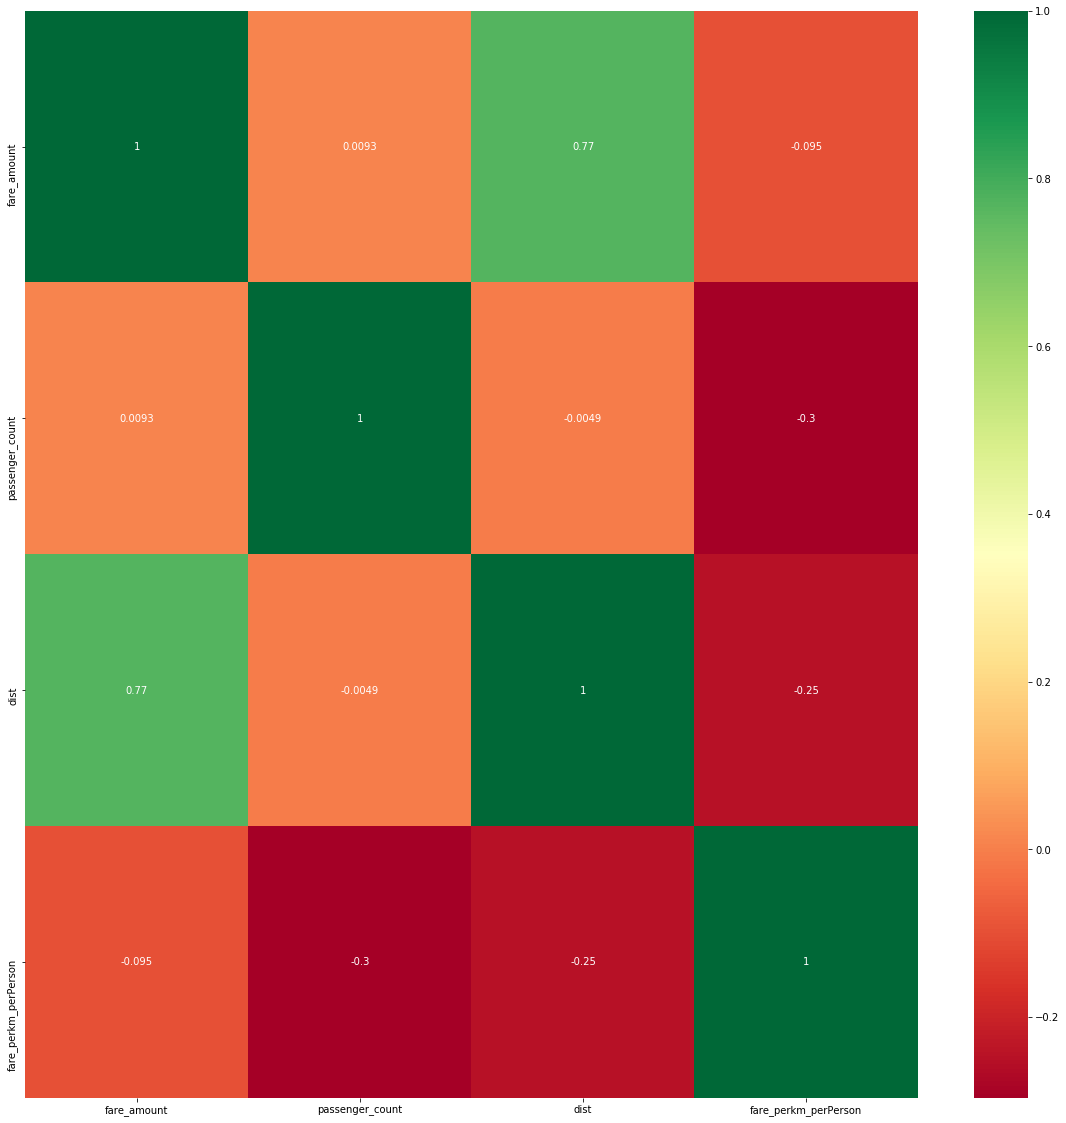

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.figure.savefig("output_heatmap1.png")
g



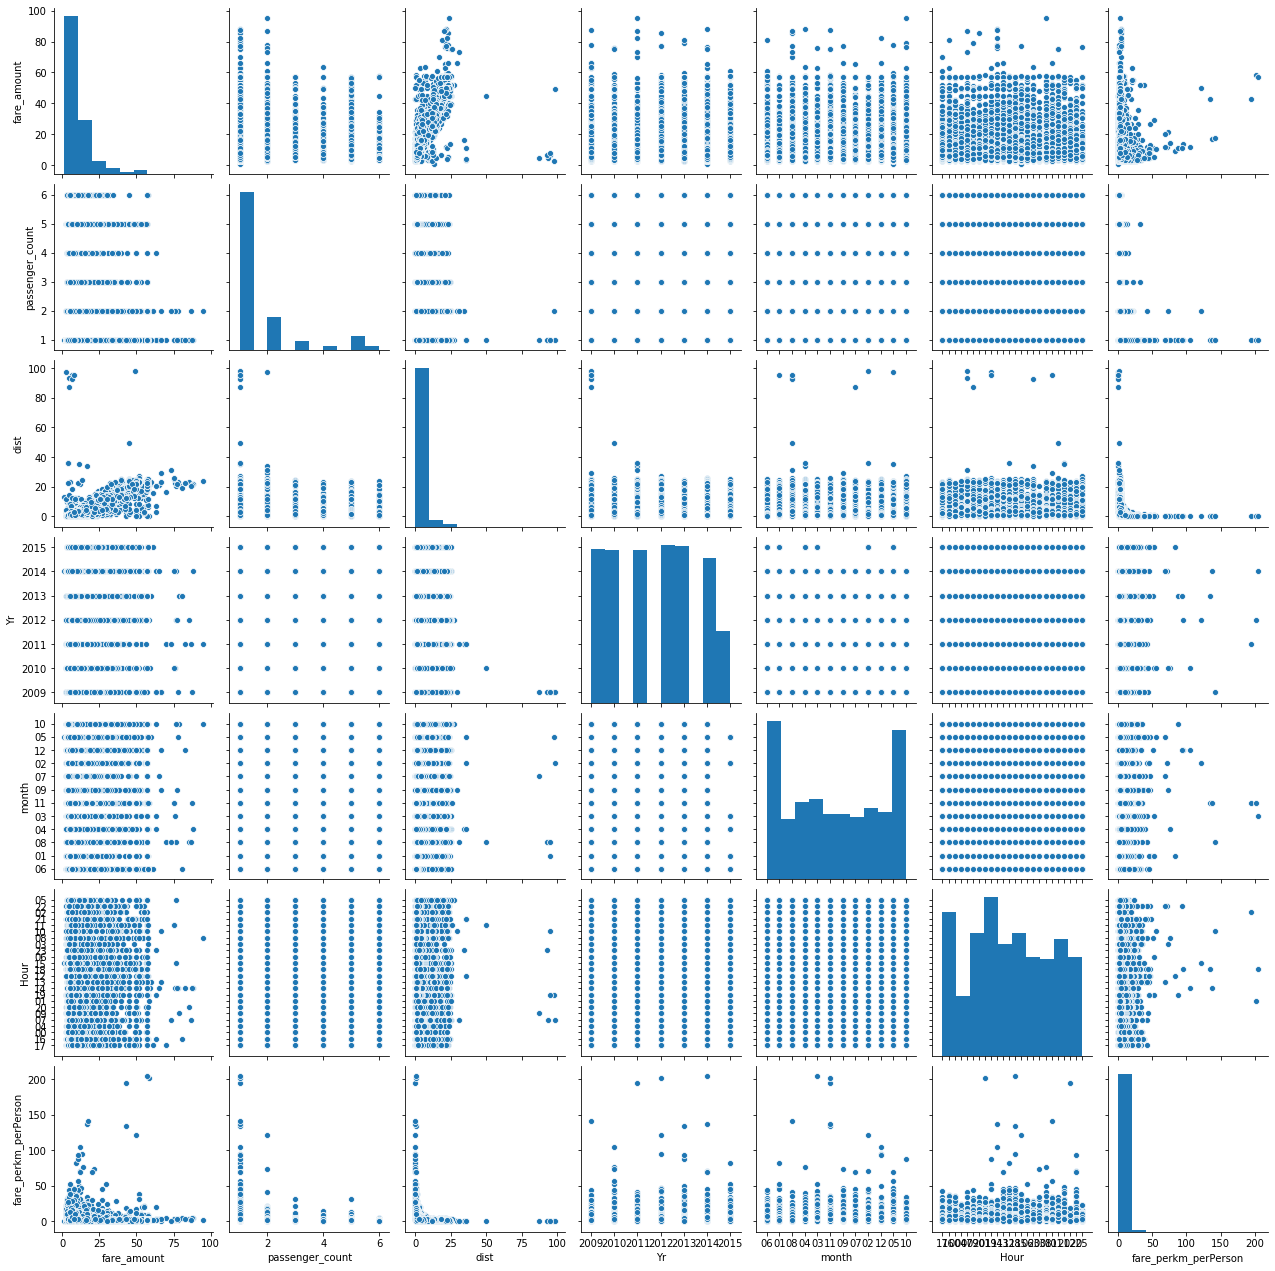

In [80]:
sns.pairplot(df)

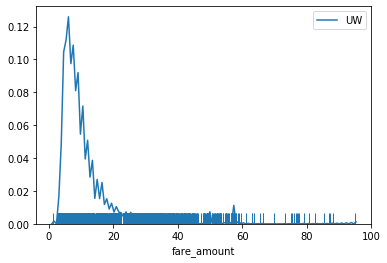

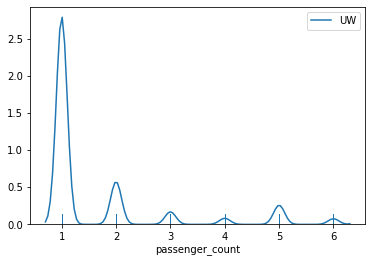

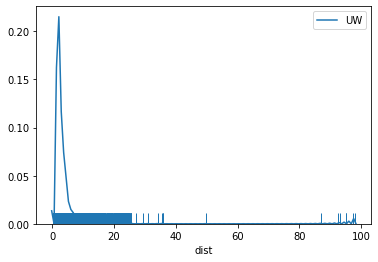

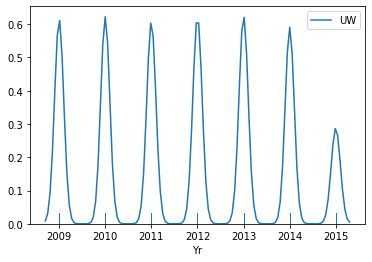

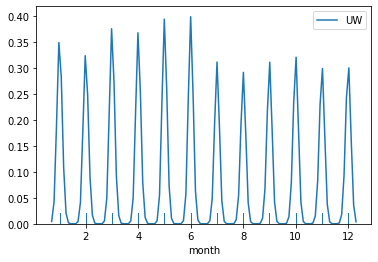

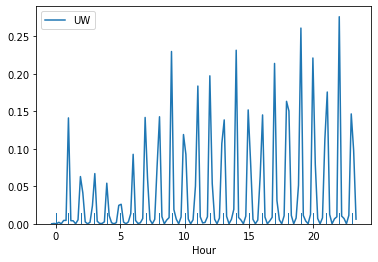

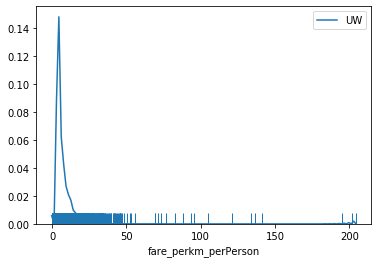

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df:
    plt.figure()
    sns.distplot(df[column],rug=True,hist=False, label='UW', kde_kws={'bw':0.1})

g = sns.FacetGrid(df, col='Hour', margin_titles=True)
g.map(sns.distplot, 
      'fare_amount',
      bins=int(df.shape[0]/5),
      color='darkblue', 
      hist_kws={'edgecolor': 'black'},
      kde_kws={'linewidth': 4});

In [82]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15303.000000,15303.000000,15303.000000,15303.000000
mean,11.279829,1.652552,2.823039,5.578912
std,9.245051,1.268121,4.318445,6.206966
min,1.140000,1.000000,0.100770,0.012820
25%,6.000000,1.000000,0.879999,2.595597
50%,8.500000,1.000000,1.580767,4.113913
75%,12.500000,2.000000,2.902729,6.654544
max,95.000000,6.000000,98.072001,204.261327


In [83]:
row_del = df[ df['dist'] <= 0.1 ].index
df = df.drop(row_del, inplace = False) 

In [84]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15303.000000,15303.000000,15303.000000,15303.000000
mean,11.279829,1.652552,2.823039,5.578912
std,9.245051,1.268121,4.318445,6.206966
min,1.140000,1.000000,0.100770,0.012820
25%,6.000000,1.000000,0.879999,2.595597
50%,8.500000,1.000000,1.580767,4.113913
75%,12.500000,2.000000,2.902729,6.654544
max,95.000000,6.000000,98.072001,204.261327


In [85]:
df[ df['fare_perkm_perPerson'] <= 0.02 ]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
1684,2.5,2,97.503799,2009,05,19,0.01282


In [86]:
row_del = df[df['fare_perkm_perPerson'] <= 0.02  ].index
df = df.drop(row_del, inplace = False) 

In [87]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15302.000000,15302.000000,15302.000000,15302.000000
mean,11.280403,1.652529,2.816852,5.579275
std,9.245081,1.268159,4.250208,6.207006
min,1.140000,1.000000,0.100770,0.047645
25%,6.000000,1.000000,0.879916,2.595716
50%,8.500000,1.000000,1.580624,4.114087
75%,12.500000,2.000000,2.902526,6.654601
max,95.000000,6.000000,98.072001,204.261327


In [88]:
df[ (df['fare_perkm_perPerson'] >= 100 )]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
625,43.00,1,0.220345,2011,11,02,195.148938
1512,43.00,1,0.321022,2013,11,18,133.947029
2358,17.00,1,0.124258,2014,11,14,136.812232
2432,58.60,1,0.290138,2012,11,01,201.972751
3876,17.70,1,0.125403,2009,08,10,141.144818
5970,57.33,1,0.280670,2014,03,18,204.261327
11556,49.80,2,0.206125,2012,02,15,120.800280
13515,11.70,1,0.111157,2010,12,14,105.256194


In [89]:
df[ (df['fare_amount'] <= 2 )]

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
1427,1.14,1,13.332276,2014,05,15,0.085507


In [90]:
row_del = df[df['fare_amount'] <= 2  ].index
df = df.drop(row_del, inplace = False) 

In [91]:
df.describe()

,fare_amount,passenger_count,dist,fare_perkm_perPerson
count,15301.000000,15301.000000,15301.000000,15301.000000
mean,11.281066,1.652572,2.816164,5.579634
std,9.245019,1.268190,4.249497,6.207050
min,2.500000,1.000000,0.100770,0.047645
25%,6.000000,1.000000,0.879834,2.595737
50%,8.500000,1.000000,1.580482,4.114261
75%,12.500000,2.000000,2.902432,6.654657
max,95.000000,6.000000,98.072001,204.261327


In [92]:
df.head()

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
0,4.5,1,0.410442,2009,06,17,10.963797
1,16.9,1,4.628504,2010,01,16,3.651288
2,5.7,2,1.001022,2011,08,00,2.847091
3,7.7,1,0.910440,2012,04,04,8.457453
4,5.3,1,1.361021,2010,03,07,3.894137


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fare_amount           15301 non-null  float64
 1   passenger_count       15301 non-null  int32  
 2   dist                  15301 non-null  float64
 3   Yr                    15301 non-null  object 
 4   month                 15301 non-null  object 
 5   Hour                  15301 non-null  object 
 6   fare_perkm_perPerson  15301 non-null  float64
dtypes: float64(3), int32(1), object(3)
memory usage: 896.5+ KB


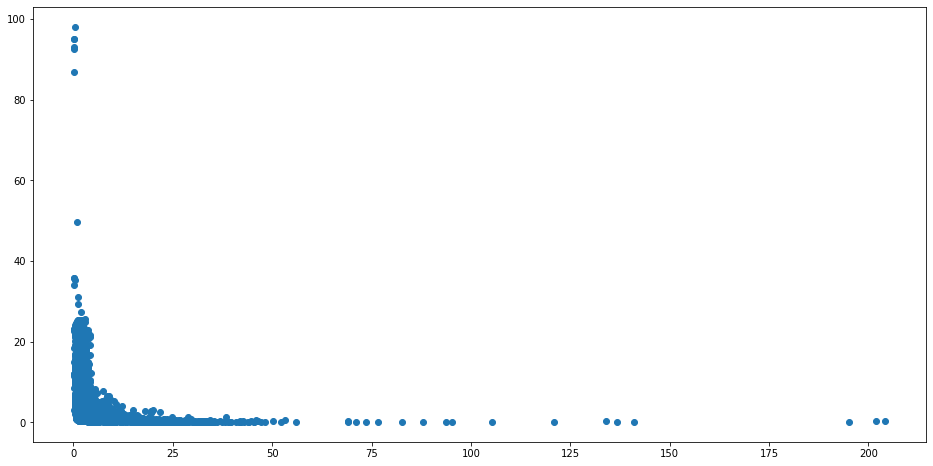

In [94]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['fare_perkm_perPerson'], df['dist'])

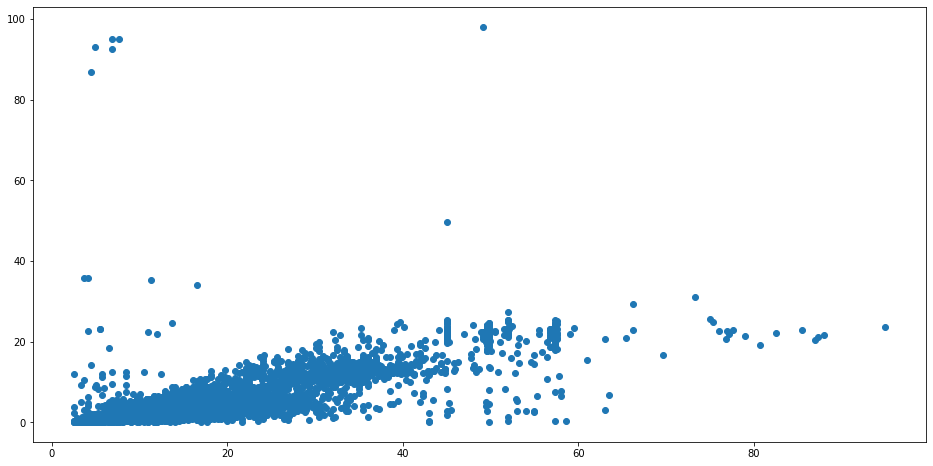

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['fare_amount'], df['dist'])

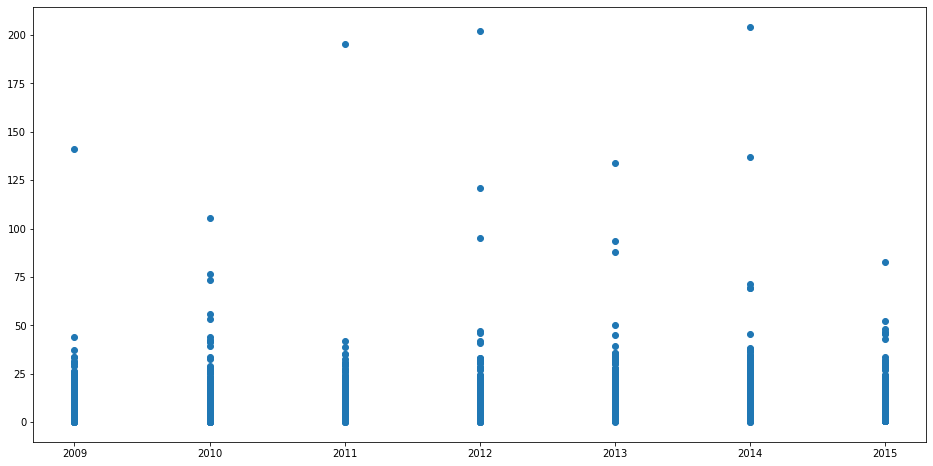

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['Yr'],df['fare_perkm_perPerson'])

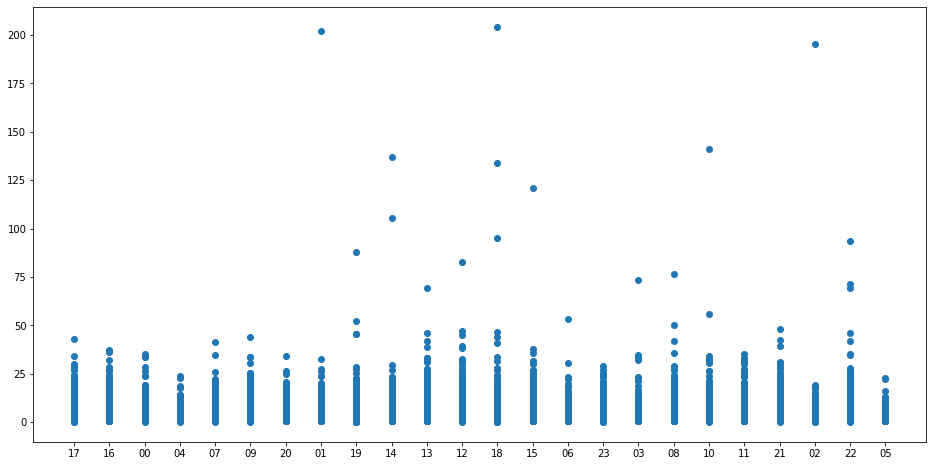

In [97]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['Hour'],df['fare_perkm_perPerson'])

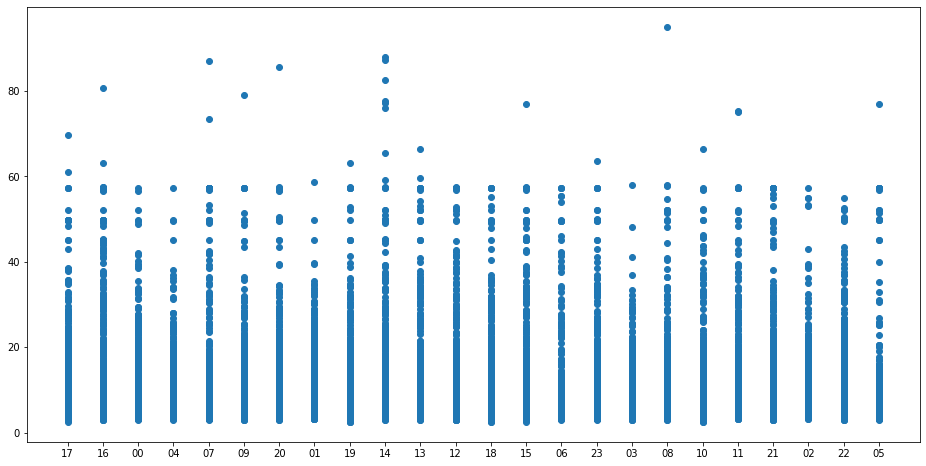

In [98]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['Hour'],df['fare_amount'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fare_amount           15301 non-null  float64
 1   passenger_count       15301 non-null  int32  
 2   dist                  15301 non-null  float64
 3   Yr                    15301 non-null  object 
 4   month                 15301 non-null  object 
 5   Hour                  15301 non-null  object 
 6   fare_perkm_perPerson  15301 non-null  float64
dtypes: float64(3), int32(1), object(3)
memory usage: 896.5+ KB


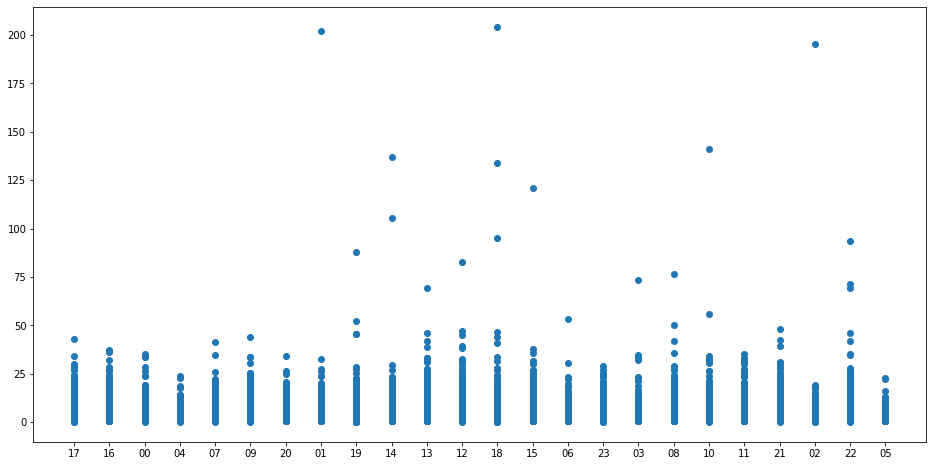

In [100]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter( df['Hour'],df['fare_perkm_perPerson'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fare_amount           15301 non-null  float64
 1   passenger_count       15301 non-null  int32  
 2   dist                  15301 non-null  float64
 3   Yr                    15301 non-null  object 
 4   month                 15301 non-null  object 
 5   Hour                  15301 non-null  object 
 6   fare_perkm_perPerson  15301 non-null  float64
dtypes: float64(3), int32(1), object(3)
memory usage: 896.5+ KB


In [102]:
df['Yr'] = df['Yr'].astype(int)
df['Hour'] = df['Hour'].astype(int)
df['month'] = df['month'].astype(int)

In [103]:
df.describe()

,fare_amount,passenger_count,dist,Yr,month,Hour,fare_perkm_perPerson
count,15301.000000,15301.000000,15301.000000,15301.000000,15301.000000,15301.000000,15301.000000
mean,11.281066,1.652572,2.816164,2011.741128,6.271812,13.504869,5.579634
std,9.245019,1.268190,4.249497,1.870368,3.447861,6.506854,6.207050
min,2.500000,1.000000,0.100770,2009.000000,1.000000,0.000000,0.047645
25%,6.000000,1.000000,0.879834,2010.000000,3.000000,9.000000,2.595737
50%,8.500000,1.000000,1.580482,2012.000000,6.000000,14.000000,4.114261
75%,12.500000,2.000000,2.902432,2013.000000,9.000000,19.000000,6.654657
max,95.000000,6.000000,98.072001,2015.000000,12.000000,23.000000,204.261327


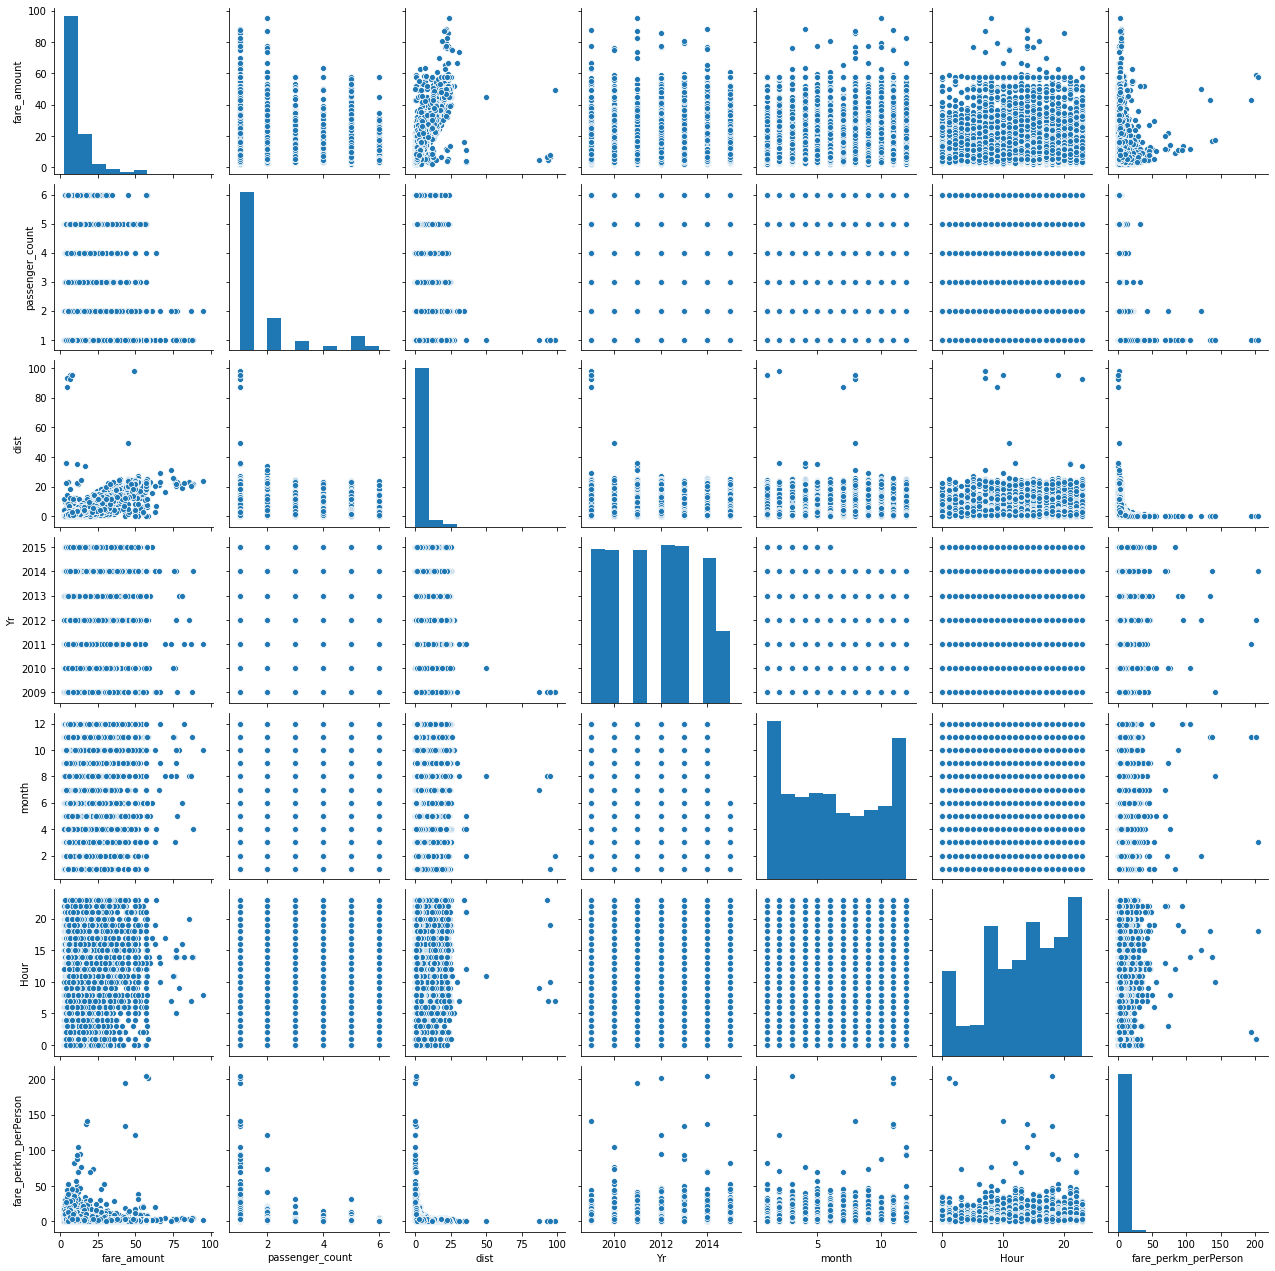

In [104]:
sns.pairplot(df)

# Machine learning models and prediction

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fare_amount           15301 non-null  float64
 1   passenger_count       15301 non-null  int32  
 2   dist                  15301 non-null  float64
 3   Yr                    15301 non-null  int32  
 4   month                 15301 non-null  int32  
 5   Hour                  15301 non-null  int32  
 6   fare_perkm_perPerson  15301 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 1.3 MB


In [106]:
df = pd.concat([df,pd.get_dummies(df['Yr'], prefix='Yr')],axis=1)
df.drop(['Yr'],axis=1, inplace=True)

In [107]:
df = pd.concat([df,pd.get_dummies(df['Hour'], prefix='Hour')],axis=1)
df.drop(['Hour'],axis=1, inplace=True)

In [108]:
df = pd.concat([df,pd.get_dummies(df['month'], prefix='month')],axis=1)
df.drop(['month'],axis=1, inplace=True)

In [109]:
df.drop(['fare_perkm_perPerson'],axis = 1,inplace =True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15301 non-null  float64
 1   passenger_count  15301 non-null  int32  
 2   dist             15301 non-null  float64
 3   Yr_2009          15301 non-null  uint8  
 4   Yr_2010          15301 non-null  uint8  
 5   Yr_2011          15301 non-null  uint8  
 6   Yr_2012          15301 non-null  uint8  
 7   Yr_2013          15301 non-null  uint8  
 8   Yr_2014          15301 non-null  uint8  
 9   Yr_2015          15301 non-null  uint8  
 10  Hour_0           15301 non-null  uint8  
 11  Hour_1           15301 non-null  uint8  
 12  Hour_2           15301 non-null  uint8  
 13  Hour_3           15301 non-null  uint8  
 14  Hour_4           15301 non-null  uint8  
 15  Hour_5           15301 non-null  uint8  
 16  Hour_6           15301 non-null  uint8  
 17  Hour_7      

In [111]:
y = df[['fare_amount']]
X = df[df.columns.difference(['fare_amount'])]

In [112]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.00366438 0.0037102  0.00333557 0.00362469 0.00325771 0.00324398
 0.00503981 0.0038247  0.00368286 0.0042299  0.00464748 0.00487022
 0.00324466 0.00309858 0.00310175 0.00469024 0.00326415 0.00265048
 0.00194177 0.00171144 0.00231195 0.00303869 0.00424016 0.00286728
 0.00417765 0.00564143 0.00409662 0.00361687 0.00429352 0.00555524
 0.00456952 0.80483227 0.00482957 0.00595381 0.0060472  0.00453098
 0.00579342 0.00561498 0.00569901 0.00532705 0.00482747 0.00384449
 0.00401603 0.00760607 0.01583415]


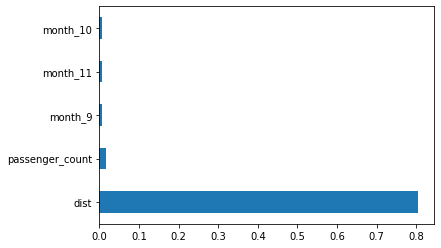

In [113]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 9 )

In [115]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(r2_score(y_test,y_pred))

0.3709802339945031


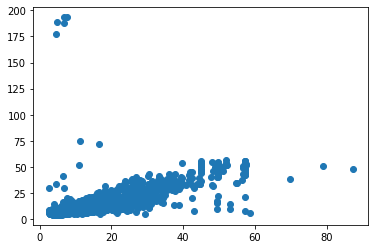

In [116]:
plt.scatter(y_test,y_pred)

In [117]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2.9536990563118812
MSE: 52.26803833042621
RMSE: 7.229663777135573


In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_DTR = dtr.predict(X_test)

print(r2_score(y_test,y_pred_DTR))

0.5528724458764713


In [119]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_DTR))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_DTR)))

MAE: 3.712289108910891
MSE: 37.15380883168317
RMSE: 6.095392426389229


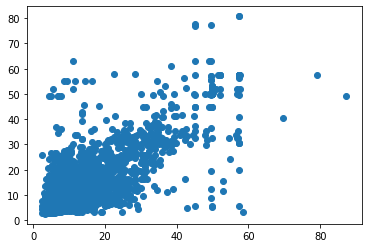

In [120]:
plt.scatter(y_test,y_pred_DTR)

In [121]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
model_KNN.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [122]:
model_KNN.fit(X_train,y_train)
y_pred_KNN = model_KNN.predict(X_test)

print(r2_score(y_test,y_pred_KNN))

0.7272735256281964


In [123]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_KNN))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_KNN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_KNN)))

MAE: 3.0356198019801983
MSE: 22.662050680396042
RMSE: 4.760467485488799


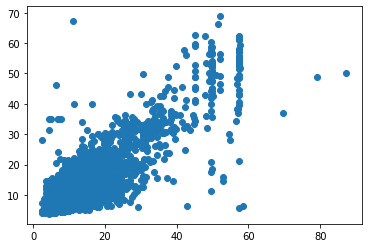

In [124]:
plt.scatter(y_test,y_pred_KNN)

In [125]:
from sklearn.ensemble import RandomForestRegressor
#Create a Gaussian Classifier
regr = RandomForestRegressor(max_depth=2, random_state=0)
#Train the model using the training sets y_pred=clf.predict(X_test)
regr.fit(X_train,y_train)

y_pred_RFR=regr.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [126]:
print(r2_score(y_test,y_pred_RFR))

0.7111468331868385


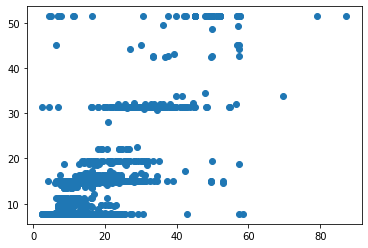

In [127]:
plt.scatter(y_test,y_pred_RFR)

In [128]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [129]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [130]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [132]:

from sklearn.model_selection import RandomizedSearchCV

In [133]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [134]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  16.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  26.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  23.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  17.9s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  18.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  16.7s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  16.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  27.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  28.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  27.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  27.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  27.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total= 1.0min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  42.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  41.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  44.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  40.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  30.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  33.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  28.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  29.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  27.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   6.8s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   7.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.6s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  52.7s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  58.8s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  56.3s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total= 1.1min
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  56.5s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.3min finished
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [135]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [136]:
rf_random.best_score_

-19.955105756086805

In [137]:
y_predictions=rf_random.predict(X_test)

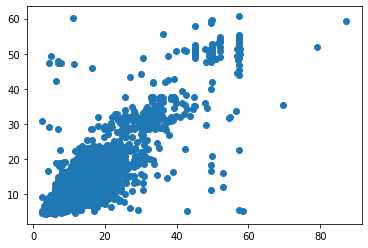

In [138]:
plt.scatter(y_test,y_predictions)

In [139]:
print(r2_score(y_test,y_predictions))

0.7597747790474652


In [140]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predictions))
print('MSE:', metrics.mean_squared_error(y_test,y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))

MAE: 2.7634784761202846
MSE: 19.961377583439035
RMSE: 4.467815750838326


hence RandomFrestRegresssor with Randomizedsearch cv is the best model for predicting this data

# Predicting values for test data

In [141]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [143]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [144]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [145]:
df_test.isnull().sum().sum()

0

In [146]:
df_test['dist'] = haversine(df_test.pickup_longitude,df_test.pickup_latitude,df_test.dropoff_longitude,df_test.dropoff_latitude)

In [147]:
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,1.090364
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,1.468609
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.355718
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.145748
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2.864812


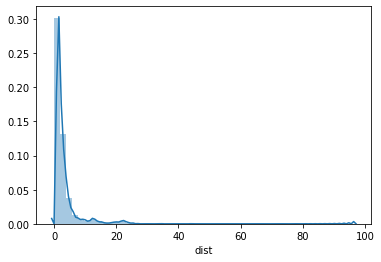

In [148]:
sns.distplot(df_test['dist'])

In [149]:
df_test['dist'].describe()

count    9914.000000
mean        2.772844
std         4.099937
min         0.000000
25%         0.880605
50%         1.599863
75%         2.909782
max        96.341596
Name: dist, dtype: float64

In [150]:
df_test.passenger_count.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [151]:
df_test = df_test.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1) 

In [152]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup_datetime  9914 non-null   object 
 1   passenger_count  9914 non-null   int64  
 2   dist             9914 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 232.5+ KB


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15301 entries, 0 to 16065
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15301 non-null  float64
 1   passenger_count  15301 non-null  int32  
 2   dist             15301 non-null  float64
 3   Yr_2009          15301 non-null  uint8  
 4   Yr_2010          15301 non-null  uint8  
 5   Yr_2011          15301 non-null  uint8  
 6   Yr_2012          15301 non-null  uint8  
 7   Yr_2013          15301 non-null  uint8  
 8   Yr_2014          15301 non-null  uint8  
 9   Yr_2015          15301 non-null  uint8  
 10  Hour_0           15301 non-null  uint8  
 11  Hour_1           15301 non-null  uint8  
 12  Hour_2           15301 non-null  uint8  
 13  Hour_3           15301 non-null  uint8  
 14  Hour_4           15301 non-null  uint8  
 15  Hour_5           15301 non-null  uint8  
 16  Hour_6           15301 non-null  uint8  
 17  Hour_7      

In [154]:
df_test.head()

,pickup_datetime,passenger_count,dist
0,2015-01-27 13:08:24 UTC,1,1.090364
1,2015-01-27 13:08:24 UTC,1,1.468609
2,2011-10-08 11:53:44 UTC,1,0.355718
3,2012-12-01 21:12:12 UTC,1,1.145748
4,2012-12-01 21:12:12 UTC,1,2.864812


In [155]:
df_test['pickup_datetime'] = df_test['pickup_datetime'].map(lambda x: x.rstrip('C'))
df_test['pickup_datetime'] = df_test['pickup_datetime'].map(lambda x: x.rstrip('T'))
df_test['pickup_datetime'] = df_test['pickup_datetime'].map(lambda x: x.rstrip('U'))


In [156]:
df_test.head()

,pickup_datetime,passenger_count,dist
0,2015-01-27 13:08:24,1,1.090364
1,2015-01-27 13:08:24,1,1.468609
2,2011-10-08 11:53:44,1,0.355718
3,2012-12-01 21:12:12,1,1.145748
4,2012-12-01 21:12:12,1,2.864812


In [157]:
df_test[['Date','time']] = df_test.pickup_datetime.str.split(expand=True) 

In [158]:
df_test.head()

,pickup_datetime,passenger_count,dist,Date,time
0,2015-01-27 13:08:24,1,1.090364,2015-01-27,13:08:24
1,2015-01-27 13:08:24,1,1.468609,2015-01-27,13:08:24
2,2011-10-08 11:53:44,1,0.355718,2011-10-08,11:53:44
3,2012-12-01 21:12:12,1,1.145748,2012-12-01,21:12:12
4,2012-12-01 21:12:12,1,2.864812,2012-12-01,21:12:12


In [159]:
df_test[['Yr','month','day']] = df_test.Date.str.split("-",expand=True) 


In [160]:
df_test.head()

,pickup_datetime,passenger_count,dist,Date,time,Yr,month,day
0,2015-01-27 13:08:24,1,1.090364,2015-01-27,13:08:24,2015,01,27
1,2015-01-27 13:08:24,1,1.468609,2015-01-27,13:08:24,2015,01,27
2,2011-10-08 11:53:44,1,0.355718,2011-10-08,11:53:44,2011,10,08
3,2012-12-01 21:12:12,1,1.145748,2012-12-01,21:12:12,2012,12,01
4,2012-12-01 21:12:12,1,2.864812,2012-12-01,21:12:12,2012,12,01


In [161]:
df_test[['Hour','minute','seconds']] = df_test.time.str.split(":",expand=True)


In [162]:
df_test.head()

,pickup_datetime,passenger_count,dist,Date,time,Yr,month,day,Hour,minute,seconds
0,2015-01-27 13:08:24,1,1.090364,2015-01-27,13:08:24,2015,01,27,13,08,24
1,2015-01-27 13:08:24,1,1.468609,2015-01-27,13:08:24,2015,01,27,13,08,24
2,2011-10-08 11:53:44,1,0.355718,2011-10-08,11:53:44,2011,10,08,11,53,44
3,2012-12-01 21:12:12,1,1.145748,2012-12-01,21:12:12,2012,12,01,21,12,12
4,2012-12-01 21:12:12,1,2.864812,2012-12-01,21:12:12,2012,12,01,21,12,12


In [163]:
df_test = df_test.drop(['pickup_datetime', 'Date','time'], axis = 1) 


In [164]:
df_test = df_test.drop(['minute','seconds','day'],axis = 1 )


In [165]:
df_test.head()

,passenger_count,dist,Yr,month,Hour
0,1,1.090364,2015,01,13
1,1,1.468609,2015,01,13
2,1,0.355718,2011,10,11
3,1,1.145748,2012,12,21
4,1,2.864812,2012,12,21


In [166]:
df_test['Yr'] = df_test['Yr'].astype(int)
df_test['Hour'] = df_test['Hour'].astype(int)
df_test['month'] = df_test['month'].astype(int)

In [172]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   dist             9914 non-null   float64
 2   month            9914 non-null   int32  
 3   Hour             9914 non-null   int32  
 4   Yr_2009          9914 non-null   uint8  
 5   Yr_2010          9914 non-null   uint8  
 6   Yr_2011          9914 non-null   uint8  
 7   Yr_2012          9914 non-null   uint8  
 8   Yr_2013          9914 non-null   uint8  
 9   Yr_2014          9914 non-null   uint8  
 10  Yr_2015          9914 non-null   uint8  
dtypes: float64(1), int32(2), int64(1), uint8(7)
memory usage: 300.3 KB


In [169]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['Yr'], prefix='Yr')],axis=1)


In [171]:
df_test.drop(['Yr'],axis=1, inplace=True)


In [173]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['Hour'], prefix='Hour')],axis=1)
df_test.drop(['Hour'],axis=1, inplace=True)


In [174]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['month'], prefix='month')],axis=1)
df_test.drop(['month'],axis=1, inplace=True)

In [175]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  9914 non-null   int64  
 1   dist             9914 non-null   float64
 2   Yr_2009          9914 non-null   uint8  
 3   Yr_2010          9914 non-null   uint8  
 4   Yr_2011          9914 non-null   uint8  
 5   Yr_2012          9914 non-null   uint8  
 6   Yr_2013          9914 non-null   uint8  
 7   Yr_2014          9914 non-null   uint8  
 8   Yr_2015          9914 non-null   uint8  
 9   Hour_0           9914 non-null   uint8  
 10  Hour_1           9914 non-null   uint8  
 11  Hour_2           9914 non-null   uint8  
 12  Hour_3           9914 non-null   uint8  
 13  Hour_4           9914 non-null   uint8  
 14  Hour_5           9914 non-null   uint8  
 15  Hour_6           9914 non-null   uint8  
 16  Hour_7           9914 non-null   uint8  
 17  Hour_8        

In [176]:
y_predictions=rf_random.predict(df_test)

In [177]:
df_test['fare_amount'] = y_predictions

In [178]:
df_test

,passenger_count,dist,Yr_2009,Yr_2010,Yr_2011,Yr_2012,Yr_2013,Yr_2014,Yr_2015,Hour_0,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,fare_amount
0,1,1.090364,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.387519
1,1,1.468609,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.387519
2,1,0.355718,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.132561
3,1,1.145748,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.980013
4,1,2.864812,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5.980013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,6,1.478721,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,5.100108
9910,6,1.836566,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.102193
9911,6,22.579590,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,5.304055
9912,6,5.546305,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.148012


In [182]:
df[df['passenger_count'] == 6]

,fare_amount,passenger_count,dist,Yr_2009,Yr_2010,Yr_2011,Yr_2012,Yr_2013,Yr_2014,Yr_2015,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
38,9.0,6,2.201037,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
60,5.0,6,0.445237,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
63,7.0,6,1.648933,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
67,16.5,6,3.221276,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
68,11.5,6,2.907322,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15825,5.3,6,0.462466,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15898,4.5,6,0.371042,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15941,24.5,6,3.862373,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16007,17.5,6,2.767961,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [183]:
df_test.describe()

,passenger_count,dist,Yr_2009,Yr_2010,Yr_2011,Yr_2012,Yr_2013,Yr_2014,Yr_2015,Hour_0,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,fare_amount
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,...,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,1.671273,2.772844,0.103087,0.176821,0.206778,0.144543,0.114485,0.191850,0.062437,0.038229,...,0.068388,0.050938,0.150797,0.066573,0.075651,0.108231,0.095118,0.078273,0.094109,5.620426
std,1.278747,4.099937,0.304087,0.381536,0.405016,0.351657,0.318415,0.393776,0.241960,0.191758,...,0.252424,0.219882,0.357869,0.249293,0.264452,0.310687,0.293393,0.268614,0.291996,0.640005
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.056936
25%,1.000000,0.880605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.117083
50%,1.000000,1.599863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.426431
75%,2.000000,2.909782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.805117
max,6.000000,96.341596,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.049596


In [184]:
df_test.to_csv('test_result.csv')